In [1]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import sys,json,os
sys.path.append('../..')
import Project.profiles as pp
import Project.plot_assist as pa
import Project.new_profiles as pnp
import Project.energetics as pe
import matplotlib
matplotlib.rcParams['font.family'] = 'serif'
matplotlib.rcParams['mathtext.fontset'] = 'dejavuserif'

In [2]:
sparcd = json.load(open('../../final_analysis/Output/sparc_new_dict.json','r'))
bestgals = json.load(open('../../final_analysis/Output/Bestgals.json','r'))

In [3]:
gal = 'F574-1'
prior = 'lcdm_reg'
gald = sparcd[prior][gal]

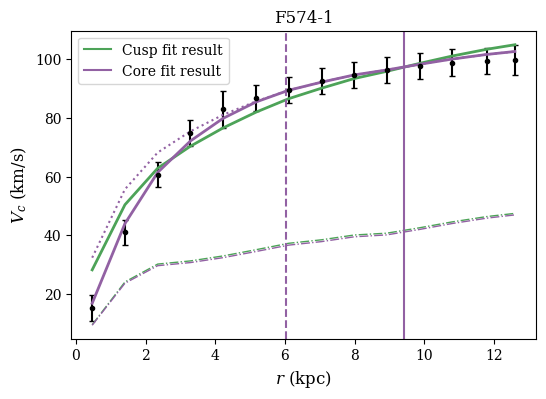

In [39]:
ax = pa.plot_RC(gal,sparcd,prior = prior)
ax.plot([-1,-1],[-1,-1],c = pa.green, label = 'Cusp fit result')
ax.plot([-1,-1],[-1,-1],c = pa.purple, label = 'Core fit result')
ax.legend()
ax.set_title(gal)
ax.set_ylabel('$V_c$ (km/s)',size = 12)
ax.set_xlabel('$r$ (kpc)',size = 12)
plt.savefig('../Output/figures/VDF/%s_rotcurv.png'%gal,bbox_inches = 'tight')

In [41]:
VDF_cusp, VDF_core = [],[]
for i in range(12):
    lm,rs = gald['core_fit']['lm'][0],gald['core_fit']['rs'][0]
    rc = gald['core_fit']['r1'][0]
    lmstar,rdstar = 0,1#gald['core_fit']['lmstar'][0],gald['core_fit']['rdstar'][0]
    cusp = pe.EI_vdf({'dm':['cusp',lm,rs],'disk':['exp',lmstar,rdstar]})
    core = pe.EI_vdf({'dm':['core',lm,rs,rc],'disk':['exp',lmstar,rdstar]})
    vdf_cusp = cusp.get_vdf(gald['r'][i],n = 50)
    vdf_core = core.get_vdf(gald['r'][i],n = 50)
    VDF_cusp.append(vdf_cusp)
    VDF_core.append(vdf_core)

/media/milan/94D4D4FAD4D4DF92/Pluviophile/Project_profShuba/Project_RC/Energetics/Notebooks/../../Project/energetics.py:138: IntegrationWarning: The algorithm does not converge.  Roundoff error is detected
  in the extrapolation table.  It is assumed that the requested tolerance
  cannot be achieved, and that the returned result (if full_output = 1) is 
  the best which can be obtained.
  I[i] = sp.integrate.quad(integrand,Rz[i],1000*Rz[i],points = Rz[i],limit = 10000)[0]


Text(0.06, 0.47, 'VDF')

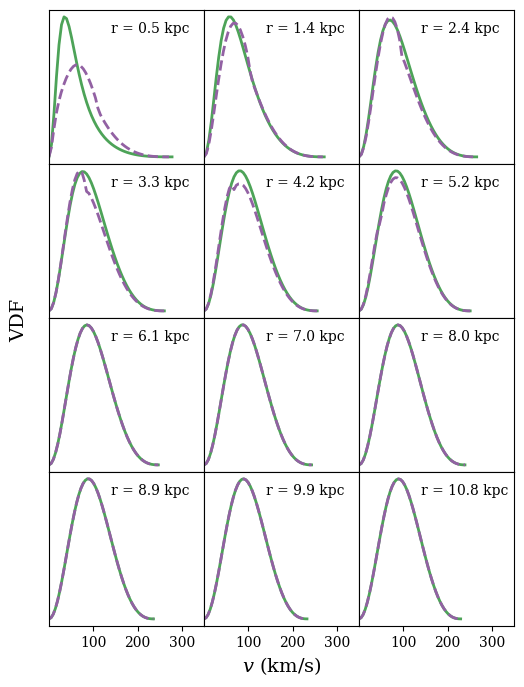

In [42]:
fig,axs = plt.subplots(4,3, figsize = (6,8), gridspec_kw = {'wspace':0,'hspace':0.})
axs = axs.flatten()
for i in range(12):
    ax = axs[i]
    ax.set_yticks([])
    vdf_cusp = VDF_cusp[i]
    vdf_core = VDF_core[i]
    ax.plot(vdf_cusp[:,0],vdf_cusp[:,1],color = pa.green, lw = 2)
    ax.plot(vdf_core[:,0],vdf_core[:,1],color = pa.purple, lw = 2,ls = '--')
    ax.set_xlim(0.1,350)
    ax.text(0.4,0.85, 'r = %.1f kpc'%gald['r'][i], transform = ax.transAxes)
axs[10].set_xlabel('$v$ (km/s)',size = 14)
fig.text(0.06,0.47,'VDF',rotation = 'vertical',size = 14)
# plt.savefig('../Output/figures/VDF/%s_core_fit_vdf.png'%gal,bbox_inches = 'tight',dpi = 300)